In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
import seaborn as sns

## Filter data

In [40]:
def filter_data(data_sent , max_flux= -12):
    data = data_sent.copy()
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [102]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    data = filter_data(data)
    #display(data)
    data_id = data[[ 'class' ,'src_n' , 'src_id' ,'significance' , ]]
    data_id = data_id.reset_index(drop=True)
    data_val = data.drop([ 'class' ,'src_n' , 'src_id' ,'significance' ,] , axis=1)
    data_val = reduce_fn(data_val)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

In [48]:

train_bh = pd.read_csv('../processed_data/BH_.csv' , index_col='obs_id')
train_bh = train_bh.sample(frac=1)
#train_bh = filter_data(train_bh , max_flux=-12)


train_ns = pd.read_csv('../processed_data/NS_.csv' ,index_col='obs_id')
train_ns = train_ns.sample(frac=1)
#train_ns = filter_data(train_ns , max_flux=-12)


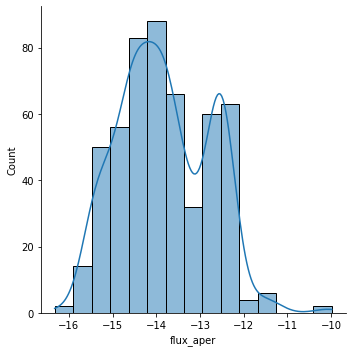

In [49]:
train_cv = pd.read_csv('../processed_data/CV_.csv' , index_col='obs_id')
train_cv = train_cv.sample(frac=1)
#train_cv = filter_data(train_cv , max_flux=-12)
sns.displot(train_cv['flux_aper'] , kde=True)

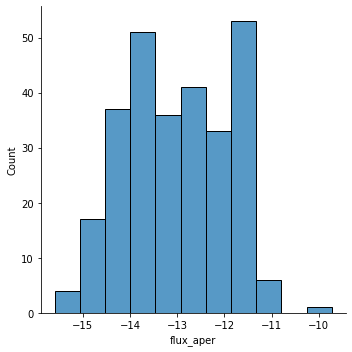

In [50]:

train_plsr = pd.read_csv('../processed_data/PULSAR_.csv' , index_col='obs_id')
dist_data = pd.read_csv('../distances/xrb-pulsar.csv')['B_ID']
train_plsr = train_plsr[~train_plsr['src_id'].isin(dist_data)]
train_plsr = train_plsr.sample(frac=1)
#train_plsr = filter_data(train_plsr , max_flux=-12)
sns.displot(train_plsr['flux_aper'])
plt.show()

In [51]:
train_plsr['src_id'].value_counts().sort_values()

PL0046     1
PL0048     1
PL0004     1
PL0114     1
PL0129     1
          ..
PL0065     8
PL0010     9
PL0009     9
PL0003    17
PL0099    59
Name: src_id, Length: 100, dtype: int64

In [52]:
train_plsr

,index,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,mstr_streak_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_145,145,PULSAR,PSR J1124-3653,PL0041,19952.1,10.27,855.81190,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_409,409,PULSAR,PSR J2017+0603,PL0118,9906.6,3.82,154.50270,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_216,216,PULSAR,PSR J1741-205,PL0079,57219.2,98.07,57964.79000,False,False,False,...,0.001943,0.002624,4.653,1.396,1.459,1.364,0.000001,0.1068,NaN,1.814
PULSAR_OBS_162,162,PULSAR,PSR J1413-6205,PL0051,9920.7,3.00,41.15043,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_425,425,PULSAR,PSR J2032+4127,PL0125,29171.5,8.11,293.44850,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_33,33,PULSAR,PSR J0358+5413,PL0009,67191.5,19.44,1522.64000,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_329,329,PULSAR,PSR J1833-103,PL0099,9702.8,121.78,20080.29000,False,False,False,...,0.000210,0.000265,1.041,60.850,194.700,30.870,205.500000,218.0000,194.30,0.976
PULSAR_OBS_392,392,PULSAR,PSR J1856+0113,PL0108,45556.5,15.97,787.19630,False,False,False,...,0.000005,0.000011,1.246,9.332,25.160,5.463,61.070000,79.5700,46.12,1.020


In [73]:
train_all = pd.concat([train_bh , train_ns  , train_cv , train_plsr] , axis=0)
#train_all = train_all.replace('NS' , 'XRB')
#train_all = train_all.replace('BH' , 'XRB')
train_all = train_all.sample(frac=1)
#display(train_all)
split  = int(1*len(train_all)) 
train = train_all.iloc[:split]
test = train_all.iloc[split:]
display(train)


,index,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,mstr_streak_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_138,138,NS,KS 1731-260,NS0033,19401.5,14.81,1109.48800,False,False,False,...,0.000632,0.003096,0.683,0.5906,0.7095,0.4872,121.000000,143.200,103.10,0.550
NS_OBS_246,246,NS,XMMU J004245.2+41172,NS0045,5089.9,2.70,32.14374,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_770,770,CV,XMMSL2 J004231.9+41162,CV0110,3974.8,174.76,172643.30000,False,False,False,...,0.000183,0.000248,1.589,11.4300,23.7400,7.0020,7.104000,15.100,1.13,1.010
CV_OBS_648,648,CV,CXOGLB J002411.8-72044,CV0092,4691.1,5.00,159.24960,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NS_OBS_40,40,NS,1A 1742-289,NS0001,27775.0,167.36,21.89294,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_755,755,CV,XMMSL2 J004231.9+41162,CV0110,4132.7,174.76,172643.30000,False,False,False,...,0.000149,0.000321,3.912,15.8700,23.9300,8.4190,0.000031,5.292,NaN,1.431
BH_OBS_191,191,BH,SAXWFC J1819.4-2524.,BH0030,9209.3,2.24,11.55864,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_394,394,PULSAR,PSR J1856+0113,PL0108,39582.0,15.97,787.19630,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
train['class'].value_counts()

CV        786
NS        440
PULSAR    280
BH        199
Name: class, dtype: int64

# RF imputer

In [75]:
from MissingValuesHandler.missing_data_handler import RandomForestImputer

In [110]:
def rf_impute(d, i ):
    data = pd.concat([i , d] , axis=1)
    data = data.drop(columns=['src_n' , 'src_id' , 'significance' ,])
    rf_imputer = RandomForestImputer(
        data=data , 
        target_variable_name='class' , 
        forbidden_features_list=[] , 
        
    )
    rf_imputer.set_ensemble_model_parameters(n_estimators=300 , additional_estimators = 50 )
    new_data =  rf_imputer.train(sample_size = 0, path_to_save_dataset='rf_imp_temp.csv')
    new_data = new_data.drop(columns= ['class'])
    return new_data , rf_imputer

# Choose Features

In [80]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from features import features as feat 
all_feat = list(feat['info'])+list(feat['flux']['photon'])+list(feat['flux']['energy'])+list(feat['variability'])+list(feat['hardness'])+list(feat['model_fit']['powerlaw'])+list(feat['model_fit']['bb'])+list(feat['model_fit']['brems'])+list(feat['info_pre_filter'])

In [82]:
#feat_to_drop = list(feat['model_fit']['powerlaw']) + list(feat['model_fit']['bb']) + list(feat['model_fit']['brems']) 
feat_to_drop = []
feat_used = [item for item in all_feat if item not in feat_to_drop]

In [92]:
train[feat_used]

,class,src_id,significance,src_n,photflux_aper_lolim_h,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_u,photflux_aper_m,photflux_aper_hilim_s,...,flux_significance_u,likelihood,livetime,flux_significance_h,flux_significance_s,mstr_sat_src_flag,flux_significance_m,flux_significance_b,mstr_streak_src_flag,gti_obs
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_138,NS,NS0033,14.81,KS 1731-260,-5.551758,-5.441171,NaN,-6.367340,-5.018907,-5.426780,...,1.03,1109.48800,19401.5,4.57,4.94,False,9.42,11.30,False,2001-03-27T00:29:14
NS_OBS_246,NS,NS0045,2.70,XMMU J004245.2+41172,-5.760951,-5.492009,NaN,NaN,NaN,-5.753009,...,NaN,32.14374,5089.9,2.23,1.45,False,0.00,2.70,False,2000-06-01T01:40:30
CV_OBS_770,CV,CV0110,174.76,XMMSL2 J004231.9+41162,-4.047304,-4.000304,NaN,NaN,-4.280586,-4.080138,...,0.00,172643.30000,3974.8,10.05,7.00,False,8.62,14.88,False,2011-06-30T12:02:28
CV_OBS_648,CV,CV0092,5.00,CXOGLB J002411.8-72044,NaN,NaN,NaN,NaN,NaN,-5.774174,...,0.00,159.24960,4691.1,0.00,0.00,False,0.00,0.00,False,2000-03-17T04:09:04
NS_OBS_40,NS,NS0001,167.36,1A 1742-289,-7.043928,-6.248028,NaN,NaN,NaN,-6.226652,...,0.00,21.89294,27775.0,1.19,0.00,False,0.00,1.05,False,2008-07-26T21:38:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_755,CV,CV0110,174.76,XMMSL2 J004231.9+41162,-4.259637,-4.202040,NaN,NaN,-4.293282,-4.116679,...,0.00,172643.30000,4132.7,8.30,7.57,False,8.98,14.51,False,2004-10-04T21:01:31
BH_OBS_191,BH,BH0030,2.24,SAXWFC J1819.4-2524.,NaN,NaN,NaN,NaN,NaN,-6.578725,...,0.00,11.55864,9209.3,0.00,0.00,False,0.00,0.00,False,2004-07-17T11:09:06
PULSAR_OBS_394,PULSAR,PL0108,15.97,PSR J1856+0113,-5.517841,-5.438779,NaN,NaN,-5.534766,-5.726304,...,0.00,787.19630,39582.0,6.01,4.28,False,6.63,9.88,False,2005-06-23T03:39:57


In [93]:
sp = [] 
for f in feat_used:
    #print(f)
    na = train[feat_used][f].isna().value_counts()
    try:
        sp.append([f , 1-na[0]/(na[0]+na[1])])
    except:
        sp.append([f , 0])
sp =  np.asarray(sp)
sparsity = pd.DataFrame(sp , columns=['feat' , 'sparsity']).sort_values(by='sparsity' , ascending=False)


In [94]:
train_set = train[feat_used]
test_set = test[feat_used]

In [99]:
train_a_b = train_set[train_set['class'].isin(['CV'])].sort_index()
train_a_b

,class,src_id,significance,src_n,photflux_aper_lolim_h,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_u,photflux_aper_m,photflux_aper_hilim_s,...,flux_significance_u,likelihood,livetime,flux_significance_h,flux_significance_s,mstr_sat_src_flag,flux_significance_m,flux_significance_b,mstr_streak_src_flag,gti_obs
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_0,CV,CV0001,9.81,[DSH2013] 24,-5.757210,-5.525784,NaN,NaN,-5.737786,-5.632831,...,0.00,250.012,9841.8,2.49,1.38,False,2.36,3.53,False,2001-09-05T00:24:13
CV_OBS_1,CV,CV0001,9.81,[DSH2013] 24,-5.874194,-5.768021,NaN,NaN,-5.823909,-5.664542,...,0.00,250.012,66285.9,4.61,2.94,False,5.09,7.53,False,2011-09-04T06:26:17
CV_OBS_10,CV,CV0002,37.03,[HPH2013] 100,NaN,NaN,NaN,NaN,NaN,-5.845880,...,0.00,4392.422,4032.6,0.00,0.00,False,0.00,0.00,False,2007-08-28T12:54:34
CV_OBS_100,CV,CV0006,23.44,[HPH2013] 123,NaN,NaN,NaN,NaN,NaN,-5.447453,...,0.00,1609.495,3907.5,0.00,1.08,False,0.00,1.03,False,2013-08-26T10:03:03
CV_OBS_101,CV,CV0006,23.44,[HPH2013] 123,NaN,NaN,NaN,NaN,NaN,-5.413300,...,0.00,1609.495,3974.2,0.00,0.00,False,0.00,0.00,False,2013-09-27T14:10:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_95,CV,CV0006,23.44,[HPH2013] 123,NaN,NaN,-4.506403,-4.409493,NaN,-6.671417,...,5.14,1609.495,36675.6,NaN,0.00,False,NaN,0.00,False,2012-06-06T14:02:49
CV_OBS_96,CV,CV0006,23.44,[HPH2013] 123,NaN,NaN,-4.453951,-4.368759,NaN,-6.854804,...,5.61,1609.495,41475.4,0.00,0.00,False,NaN,0.00,False,2012-06-12T12:21:42
CV_OBS_97,CV,CV0006,23.44,[HPH2013] 123,NaN,NaN,-4.403953,-4.324955,NaN,NaN,...,6.01,1609.495,39875.5,NaN,NaN,False,0.00,0.00,False,2012-07-01T11:18:27


In [105]:
train_a_b['src_id'].value_counts()

CV0110    101
CV0037     45
CV0018     33
CV0011     33
CV0006     33
         ... 
CV0095      1
CV0096      1
CV0097      1
CV0063      1
CV0058      1
Name: src_id, Length: 70, dtype: int64

In [106]:
data_val , data_id   = extract_data(train_a_b ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )

In [107]:
data_val

,photflux_aper_lolim_h,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_u,photflux_aper_m,photflux_aper_hilim_s,photflux_aper_hilim_u,photflux_aper_lolim_s,photflux_aper_b,photflux_aper_hilim_h,...,bb_kt_lolim,bb_kt,bb_stat,brems_nh_hilim,brems_nh,brems_kt_hilim,brems_kt_lolim,brems_kt,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_503,-7.423083,-6.167874,-6.097779,-5.398809,-5.965773,-5.606249,-5.143513,-6.240559,-5.387958,-5.891773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_700,-4.114865,-4.064644,NaN,NaN,-4.210137,-4.074482,-4.174574,-4.198528,-3.516555,-4.019633,...,0.6445,0.6849,1.734,19.74,12.49,9.219,4.195,5.86,6.002,0.962
CV_OBS_598,NaN,NaN,NaN,NaN,NaN,-4.650140,NaN,-6.056703,-4.835945,-5.131297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_554,NaN,NaN,NaN,NaN,-6.121938,-5.513570,-5.694434,-5.998699,-5.394911,-6.249646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_782,-4.163486,-4.112608,-5.086027,-3.671009,-4.235226,-4.190440,-3.387110,-4.345246,-3.597739,-4.067070,...,0.6922,0.7407,1.666,28.94,18.22,10.270,4.217,6.15,8.972,0.861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_72,NaN,NaN,NaN,NaN,NaN,-5.856673,-4.282080,NaN,-5.920457,-5.994391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_15,-6.660946,-5.639785,NaN,NaN,NaN,-5.548214,-3.704873,NaN,-5.529002,-5.370896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_666,-5.766496,-5.506960,NaN,NaN,-5.979639,-6.025442,-5.495529,-7.543938,-5.258691,-5.353106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
data_id['src_id'].value_counts()

CV0110    97
CV0037    19
CV0085    13
CV0069    13
CV0087    13
          ..
CV0095     1
CV0098     1
CV0112     1
CV0097     1
CV0049     1
Name: src_id, Length: 65, dtype: int64

In [111]:
new_data , random_forest_imputer = rf_impute(data_val, data_id)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [233]:
new_data

,photflux_aper_u,photflux_aper_lolim_s,photflux_aper_hilim_h,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_b,photflux_aper_hilim_s,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_b,...,ks_prob,hard_hm_hilim,hard_hm,hard_hs_hilim,hard_hs_lolim,hard_hm_lolim,hard_ms,hard_hs,hard_ms_lolim,hard_ms_hilim
0,-4.000000,-5.000000,-5.428291,-5.000000,-5.000000,-5.340654,-5.648204,-5.717151,-5.000000,-5.629487,...,0.000000,1.0000,0.9994,1.0000,-0.0019,0.2655,-0.9994,0.9994,-1.0000,0.1018
1,-3.734004,-6.096856,-5.643783,-6.911155,-6.005903,-5.090123,-5.231584,-5.911155,-4.848018,-5.274660,...,0.696000,0.6190,0.1711,-0.1418,-0.8626,-0.3354,-0.6671,-0.5809,-0.9126,-0.2680
2,-4.000000,-5.893129,-5.904482,-5.000000,-5.975925,-5.129362,-5.467118,-6.190979,-5.000000,-5.254301,...,0.627000,0.2792,-0.1574,-0.2155,-0.8389,-0.5953,-0.4072,-0.5659,-0.6814,-0.0868
3,-4.000000,-5.000000,-5.247337,-5.589729,-5.639975,-4.984221,-6.398375,-5.385630,-5.000000,-5.090070,...,0.795333,0.5340,0.3036,1.0000,0.8189,0.0418,0.9994,0.9994,0.7002,1.0000
4,-4.000000,-5.403403,-5.718739,-6.997402,-5.506960,-4.775208,-4.969805,-5.997402,-5.000000,-4.894149,...,0.149500,-0.1455,-0.5134,-0.5640,-0.9413,-0.8001,-0.4622,-0.7908,-0.6852,-0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,-4.000000,-4.226506,-4.161781,-4.282080,-4.319211,-3.591760,-4.092589,-4.217742,-5.000000,-3.625068,...,0.493750,0.2117,0.1224,0.0231,-0.1755,0.0281,-0.1974,-0.0775,-0.2892,-0.0993
759,-5.525492,-5.721704,-5.717831,-5.876802,-5.830620,-5.098106,-5.602581,-5.789949,-5.650528,-5.135489,...,0.465400,0.1655,0.0525,-0.0394,-0.2555,-0.0643,-0.1974,-0.1474,-0.2917,-0.1006
760,-4.000000,-5.000000,-5.623788,-5.838632,-6.255707,-5.447210,-6.999132,-5.718058,-5.000000,-5.528855,...,0.483667,0.6977,0.5584,1.0000,0.9026,0.4016,0.9994,0.9994,0.6977,1.0000
761,-4.862329,-4.566390,-5.744486,-6.058389,-4.982549,-4.266963,-4.502932,-5.869345,-5.098869,-4.290730,...,0.820400,-0.6977,-0.7708,-0.8826,-0.9400,-0.8401,-0.4772,-0.9132,-0.5228,-0.4291


In [234]:
sample_used                         = random_forest_imputer.get_sample()
features_type_prediction            = random_forest_imputer.get_features_type_predictions()
target_variable_type_prediction     = random_forest_imputer.get_target_variable_type_prediction()
encoded_features                    = random_forest_imputer.get_encoded_features()
encoded_target_variable             = random_forest_imputer.get_target_variable_encoded()
final_proximity_matrix              = random_forest_imputer.get_proximity_matrix()
final_distance_matrix               = random_forest_imputer.get_distance_matrix()
weighted_averages                   = random_forest_imputer.get_nan_features_predictions(option="all")
convergent_values                   = random_forest_imputer.get_nan_features_predictions(option="conv")
divergent_values                    = random_forest_imputer.get_nan_features_predictions(option="div")
ensemble_model_parameters           = random_forest_imputer.get_ensemble_model_parameters()
all_target_value_predictions        = random_forest_imputer.get_nan_target_values_predictions(option="all")
target_value_predictions            = random_forest_imputer.get_nan_target_values_predictions(option="one")


In [235]:
encoded_features_norm = norm_data(encoded_features)
encoded_features

,photflux_aper_u,photflux_aper_lolim_s,photflux_aper_hilim_h,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_b,photflux_aper_hilim_s,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_b,...,ks_prob,hard_hm_hilim,hard_hm,hard_hs_hilim,hard_hs_lolim,hard_hm_lolim,hard_ms,hard_hs,hard_ms_lolim,hard_ms_hilim
0,-4.000000,-5.000000,-5.428291,-5.000000,-5.000000,-5.340654,-5.648204,-5.717151,-5.000000,-5.629487,...,0.000000,1.0000,0.9994,1.0000,-0.0019,0.2655,-0.9994,0.9994,-1.0000,0.1018
1,-3.734004,-6.096856,-5.643783,-6.911155,-6.005903,-5.090123,-5.231584,-5.911155,-4.848018,-5.274660,...,0.696000,0.6190,0.1711,-0.1418,-0.8626,-0.3354,-0.6671,-0.5809,-0.9126,-0.2680
2,-4.000000,-5.893129,-5.904482,-5.000000,-5.975925,-5.129362,-5.467118,-6.190979,-5.000000,-5.254301,...,0.627000,0.2792,-0.1574,-0.2155,-0.8389,-0.5953,-0.4072,-0.5659,-0.6814,-0.0868
3,-4.000000,-5.000000,-5.247337,-5.589729,-5.639975,-4.984221,-6.398375,-5.385630,-5.000000,-5.090070,...,0.795333,0.5340,0.3036,1.0000,0.8189,0.0418,0.9994,0.9994,0.7002,1.0000
4,-4.000000,-5.403403,-5.718739,-6.997402,-5.506960,-4.775208,-4.969805,-5.997402,-5.000000,-4.894149,...,0.149500,-0.1455,-0.5134,-0.5640,-0.9413,-0.8001,-0.4622,-0.7908,-0.6852,-0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,-4.000000,-4.226506,-4.161781,-4.282080,-4.319211,-3.591760,-4.092589,-4.217742,-5.000000,-3.625068,...,0.493750,0.2117,0.1224,0.0231,-0.1755,0.0281,-0.1974,-0.0775,-0.2892,-0.0993
759,-5.525492,-5.721704,-5.717831,-5.876802,-5.830620,-5.098106,-5.602581,-5.789949,-5.650528,-5.135489,...,0.465400,0.1655,0.0525,-0.0394,-0.2555,-0.0643,-0.1974,-0.1474,-0.2917,-0.1006
760,-4.000000,-5.000000,-5.623788,-5.838632,-6.255707,-5.447210,-6.999132,-5.718058,-5.000000,-5.528855,...,0.483667,0.6977,0.5584,1.0000,0.9026,0.4016,0.9994,0.9994,0.6977,1.0000
761,-4.862329,-4.566390,-5.744486,-6.058389,-4.982549,-4.266963,-4.502932,-5.869345,-5.098869,-4.290730,...,0.820400,-0.6977,-0.7708,-0.8826,-0.9400,-0.8401,-0.4772,-0.9132,-0.5228,-0.4291


In [236]:
data_id 

,obs_id,class,src_n,src_id,significance
0,NS_OBS_254,XRB,XMMU J004245.2+41172,NS0046,4.71
1,NS_OBS_207,XRB,XMMU J004245.2+41172,NS0044,49.26
2,CV_OBS_569,CV,CXOGLB J002407.9-72045,CV0085,16.47
3,CV_OBS_644,CV,CXOGLB J002410.7-72042,CV0091,23.78
4,NS_OBS_182,XRB,XMMU J004245.2+41172,NS0044,49.26
...,...,...,...,...,...
758,CV_OBS_764,CV,XMMSL2 J004231.9+41162,CV0110,174.76
759,CV_OBS_399,CV,CXOGLB J002402.5-72051,CV0070,22.52
760,NS_OBS_404,XRB,SAXWFC J1748.1-2446.,NS0072,19.47
761,NS_OBS_75,XRB,3A 2129+470,NS0011,41.03


In [237]:
encoded_features

,photflux_aper_u,photflux_aper_lolim_s,photflux_aper_hilim_h,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_b,photflux_aper_hilim_s,photflux_aper_h,photflux_aper_lolim_u,photflux_aper_b,...,ks_prob,hard_hm_hilim,hard_hm,hard_hs_hilim,hard_hs_lolim,hard_hm_lolim,hard_ms,hard_hs,hard_ms_lolim,hard_ms_hilim
0,-4.000000,-5.000000,-5.428291,-5.000000,-5.000000,-5.340654,-5.648204,-5.717151,-5.000000,-5.629487,...,0.000000,1.0000,0.9994,1.0000,-0.0019,0.2655,-0.9994,0.9994,-1.0000,0.1018
1,-3.734004,-6.096856,-5.643783,-6.911155,-6.005903,-5.090123,-5.231584,-5.911155,-4.848018,-5.274660,...,0.696000,0.6190,0.1711,-0.1418,-0.8626,-0.3354,-0.6671,-0.5809,-0.9126,-0.2680
2,-4.000000,-5.893129,-5.904482,-5.000000,-5.975925,-5.129362,-5.467118,-6.190979,-5.000000,-5.254301,...,0.627000,0.2792,-0.1574,-0.2155,-0.8389,-0.5953,-0.4072,-0.5659,-0.6814,-0.0868
3,-4.000000,-5.000000,-5.247337,-5.589729,-5.639975,-4.984221,-6.398375,-5.385630,-5.000000,-5.090070,...,0.795333,0.5340,0.3036,1.0000,0.8189,0.0418,0.9994,0.9994,0.7002,1.0000
4,-4.000000,-5.403403,-5.718739,-6.997402,-5.506960,-4.775208,-4.969805,-5.997402,-5.000000,-4.894149,...,0.149500,-0.1455,-0.5134,-0.5640,-0.9413,-0.8001,-0.4622,-0.7908,-0.6852,-0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,-4.000000,-4.226506,-4.161781,-4.282080,-4.319211,-3.591760,-4.092589,-4.217742,-5.000000,-3.625068,...,0.493750,0.2117,0.1224,0.0231,-0.1755,0.0281,-0.1974,-0.0775,-0.2892,-0.0993
759,-5.525492,-5.721704,-5.717831,-5.876802,-5.830620,-5.098106,-5.602581,-5.789949,-5.650528,-5.135489,...,0.465400,0.1655,0.0525,-0.0394,-0.2555,-0.0643,-0.1974,-0.1474,-0.2917,-0.1006
760,-4.000000,-5.000000,-5.623788,-5.838632,-6.255707,-5.447210,-6.999132,-5.718058,-5.000000,-5.528855,...,0.483667,0.6977,0.5584,1.0000,0.9026,0.4016,0.9994,0.9994,0.6977,1.0000
761,-4.862329,-4.566390,-5.744486,-6.058389,-4.982549,-4.266963,-4.502932,-5.869345,-5.098869,-4.290730,...,0.820400,-0.6977,-0.7708,-0.8826,-0.9400,-0.8401,-0.4772,-0.9132,-0.5228,-0.4291


In [241]:
processed_data_all = pd.concat([data_id , encoded_features] , axis=1)
processed_data_all.to_csv('../processed_data/v2/train_none_rf_impute_cv_xrb')

In [242]:
processed_data_all

,obs_id,class,src_n,src_id,significance,photflux_aper_u,photflux_aper_lolim_s,photflux_aper_hilim_h,photflux_aper_lolim_h,photflux_aper_m,...,ks_prob,hard_hm_hilim,hard_hm,hard_hs_hilim,hard_hs_lolim,hard_hm_lolim,hard_ms,hard_hs,hard_ms_lolim,hard_ms_hilim
0,NS_OBS_254,XRB,XMMU J004245.2+41172,NS0046,4.71,-4.000000,-5.000000,-5.428291,-5.000000,-5.000000,...,0.000000,1.0000,0.9994,1.0000,-0.0019,0.2655,-0.9994,0.9994,-1.0000,0.1018
1,NS_OBS_207,XRB,XMMU J004245.2+41172,NS0044,49.26,-3.734004,-6.096856,-5.643783,-6.911155,-6.005903,...,0.696000,0.6190,0.1711,-0.1418,-0.8626,-0.3354,-0.6671,-0.5809,-0.9126,-0.2680
2,CV_OBS_569,CV,CXOGLB J002407.9-72045,CV0085,16.47,-4.000000,-5.893129,-5.904482,-5.000000,-5.975925,...,0.627000,0.2792,-0.1574,-0.2155,-0.8389,-0.5953,-0.4072,-0.5659,-0.6814,-0.0868
3,CV_OBS_644,CV,CXOGLB J002410.7-72042,CV0091,23.78,-4.000000,-5.000000,-5.247337,-5.589729,-5.639975,...,0.795333,0.5340,0.3036,1.0000,0.8189,0.0418,0.9994,0.9994,0.7002,1.0000
4,NS_OBS_182,XRB,XMMU J004245.2+41172,NS0044,49.26,-4.000000,-5.403403,-5.718739,-6.997402,-5.506960,...,0.149500,-0.1455,-0.5134,-0.5640,-0.9413,-0.8001,-0.4622,-0.7908,-0.6852,-0.1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,CV_OBS_764,CV,XMMSL2 J004231.9+41162,CV0110,174.76,-4.000000,-4.226506,-4.161781,-4.282080,-4.319211,...,0.493750,0.2117,0.1224,0.0231,-0.1755,0.0281,-0.1974,-0.0775,-0.2892,-0.0993
759,CV_OBS_399,CV,CXOGLB J002402.5-72051,CV0070,22.52,-5.525492,-5.721704,-5.717831,-5.876802,-5.830620,...,0.465400,0.1655,0.0525,-0.0394,-0.2555,-0.0643,-0.1974,-0.1474,-0.2917,-0.1006
760,NS_OBS_404,XRB,SAXWFC J1748.1-2446.,NS0072,19.47,-4.000000,-5.000000,-5.623788,-5.838632,-6.255707,...,0.483667,0.6977,0.5584,1.0000,0.9026,0.4016,0.9994,0.9994,0.6977,1.0000
761,NS_OBS_75,XRB,3A 2129+470,NS0011,41.03,-4.862329,-4.566390,-5.744486,-6.058389,-4.982549,...,0.820400,-0.6977,-0.7708,-0.8826,-0.9400,-0.8401,-0.4772,-0.9132,-0.5228,-0.4291


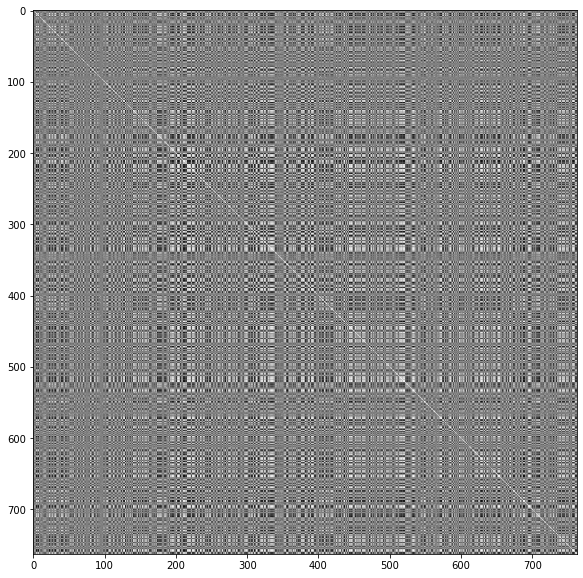

In [243]:
plt.figure(figsize=(12,10))
plt.imshow(
    final_proximity_matrix , 
    cmap='gray'
)
plt.show()

# Median Imputer

In [244]:
data_val , data_id   = extract_data(train ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )
data_val

,index,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,755,-12.826231,-13.615826,-12.830326,-12.288868,-12.117475,-12.940815,NaN,-12.927383,-12.394479,...,1.493000e-04,3.212000e-04,3.912,15.87,23.93,8.419,0.000031,5.292,NaN,1.431
1,433,-14.020998,-14.438422,-14.066209,-13.595508,-13.402086,-14.170954,-14.907982,-14.214385,-13.771600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,-14.758703,-14.335264,-14.860121,-14.240408,-14.134008,-15.133535,-14.978811,-15.357437,-14.681311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-14.744004,-13.579055,-14.446724,-13.830620,-13.873544,NaN,NaN,-15.736601,-15.245575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140,-15.057645,-13.759451,-14.358823,-13.343998,-13.315514,-15.506263,NaN,-14.554551,-13.460046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,564,-14.554240,-15.248336,-14.598944,-14.326518,-14.068339,-14.706196,-15.788346,-14.785686,-14.653061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,52,-14.870632,NaN,-15.292004,-14.891435,-14.612610,-15.096205,NaN,-15.739213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,472,-14.763715,-15.406603,-14.785951,NaN,-13.311135,-15.268814,NaN,-15.241088,NaN,...,6.249000e-07,9.878000e-07,2.499,13.58,NaN,4.293,254.800000,304.800,148.3,3.854
936,126,-14.443818,-15.109859,-14.828566,-14.793444,-14.264401,-14.643401,-16.120560,-15.176004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
